In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# initialize the HOG detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [4]:
image = cv2.imread('./Computer Vision/Task-2.jpg')

In [5]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [6]:
rects, weights = hog.detectMultiScale(img_gray, winStride=(2, 2), padding=(8, 8), scale=1.3,hitThreshold=0.8,useMeanshiftGrouping=2,finalThreshold=0.8)

In [7]:
orig = image.copy()

In [8]:
# draw the original bounding boxes
for (x, y, w, h) in rects:
    cv2.rectangle(orig, (x, y), (x + w, y + h), (0,0,255), 3)
#     break

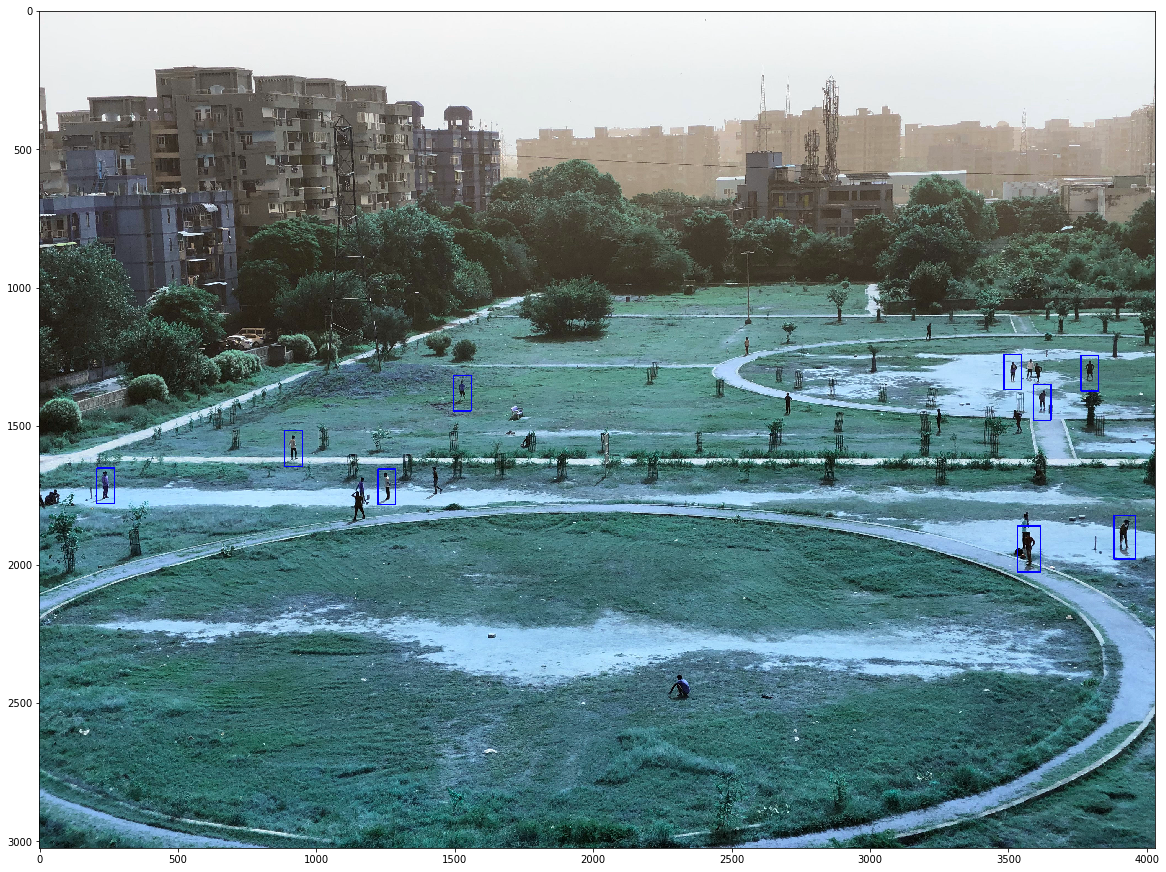

In [9]:
plt.figure(figsize=(20,20))
plt.imshow(orig)

In [10]:
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [11]:
with open('Computer Vision/Task-2.txt') as l:
    gt_labels= l.readlines()
gt_labels = [w.replace('\n','').split()[1:] for w in gt_labels]

In [12]:
gt_labels

[['0.899926', '0.466931', '0.017609', '0.035053'],
 ['0.972842', '0.624504', '0.024058', '0.052579'],
 ['0.888393', '0.645668', '0.019345', '0.055886'],
 ['0.874752', '0.432209', '0.013889', '0.029762'],
 ['0.942088', '0.428571', '0.017113', '0.033069'],
 ['0.378348', '0.447255', '0.013145', '0.030754'],
 ['0.229539', '0.520999', '0.013145', '0.032077'],
 ['0.059772', '0.562996', '0.017857', '0.045304'],
 ['0.313244', '0.565476', '0.016369', '0.040344']]

In [13]:
gt_coords=[]
for (x, y, w, h) in gt_labels:
    left,right,top,bottom =int(float(x)*image.shape[1]),int(float(x)*image.shape[1])+int(float(w)*image.shape[1]),int(float(y)*image.shape[0]),int(float(y)*image.shape[0])+int(float(h)*image.shape[0])
    gt_coords.append([left,right,top,bottom])

In [14]:
detected_coords=[]
for (x, y, w, h) in rects:
    left,right,top,bottom =x,x+w,y,y+h
    detected_coords.append([left,right,top,bottom])

In [15]:
orig = image.copy()

In [16]:
for i in range(len(detected_coords)):
    bb1 = {'x1':detected_coords[i][2],'x2':detected_coords[i][3],'y1':detected_coords[i][0],'y2':detected_coords[i][1]}
    bb2 = {'x1':gt_coords[i][2],'x2':gt_coords[i][3],'y1':gt_coords[i][0],'y2':gt_coords[i][1]}
#     print(bb1,bb2)
#     print(get_iou(bb1,bb2))
    iou = get_iou(bb1,bb2)
    
    cv2.rectangle(orig, (rects[i][0], rects[i][1]), (rects[i][0] + rects[i][2], rects[i][1] + rects[i][3]), (0,0,255), 3)
    cv2.putText(orig, 'IOU='+str(iou), (rects[i][0], rects[i][1]-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (55,255,12), 3)

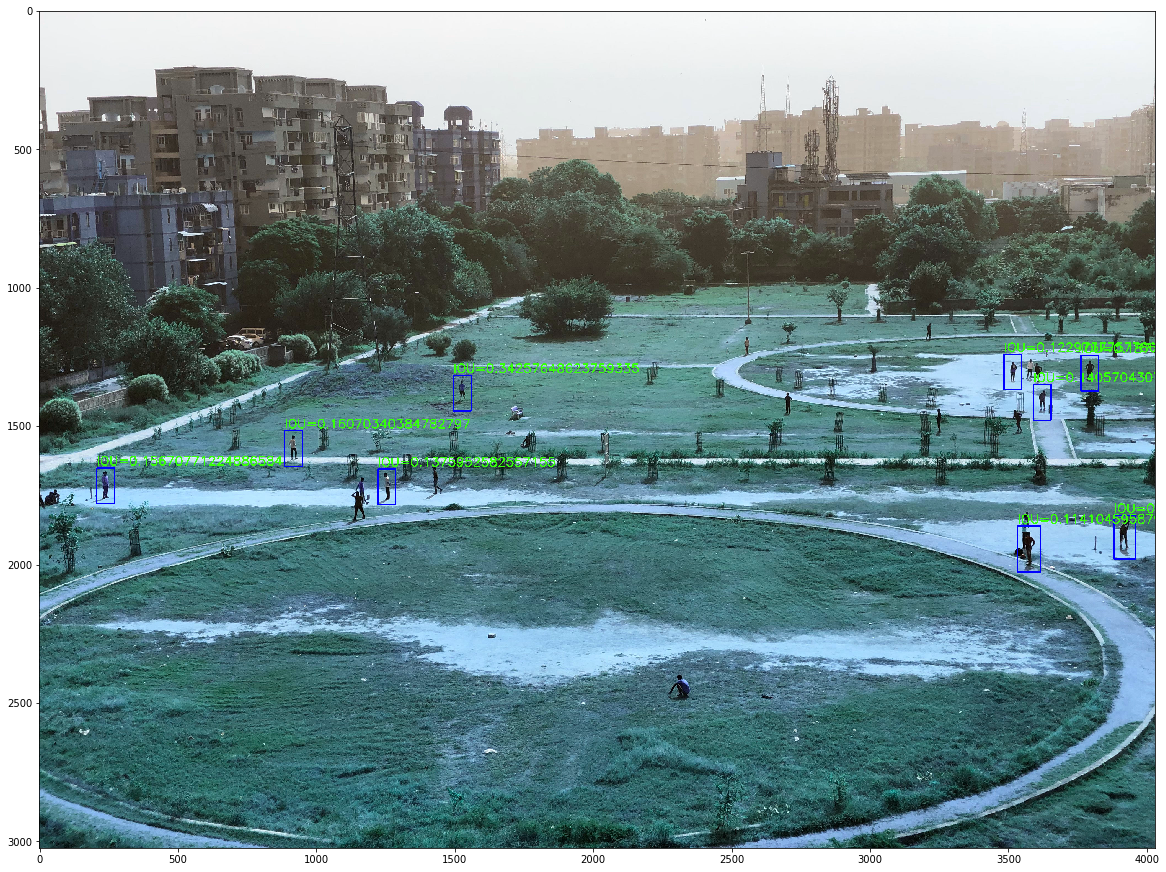

In [17]:
plt.figure(figsize=(20,20))
plt.imshow(orig)

In [18]:
human_count = len(detected_coords)
print(human_count)

9


In [20]:
cv2.imwrite('Task-2_iou_output.png', orig)

True